In [0]:
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


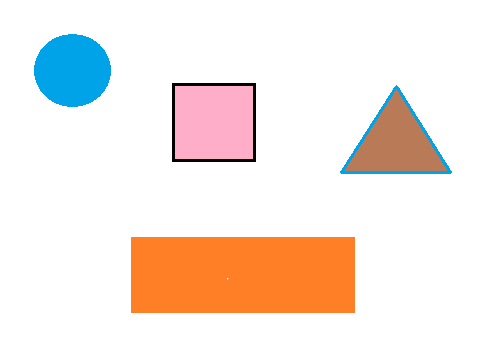

In [0]:
image = cv2.imread("/content/drive/My Drive/Data/shape.png")
cv2_imshow(image)

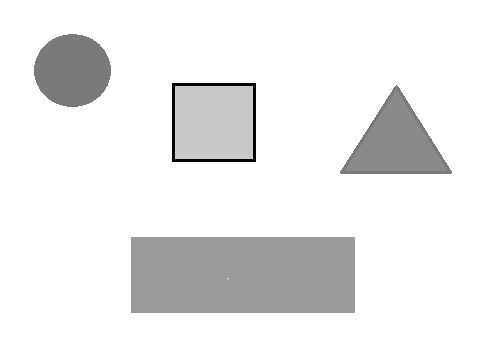

In [0]:
imgGray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(imgGray)

In [0]:
_, thrash=cv2.threshold(imgGray, 240, 255, cv2.THRESH_BINARY)
_,contours,h= cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  approx=cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True), True)
  cv2.drawContours(image, [approx],0,(0,0,0),5)
  x=approx.ravel()[0]
  y=approx.ravel()[1]-20
  if len(approx)==3:
    cv2.putText(image, "Triangle",(x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
  elif len(approx)==4:
    x,y,w,h=cv2.boundingRect(approx)
    aspectRatio=float(w)/h
    if aspectRatio>=0.50 and aspectRatio<=2.05:
      cv2.putText(image, "Square",(x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
    else:
      cv2.putText(image, "Rectangle",(x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
  elif len(approx)==5:
    cv2.putText(image, "Pentagon",(x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
  elif len(approx)==10:
    cv2.putText(image, "Star",(x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
  else:
    cv2.putText(image, "Circle",(x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

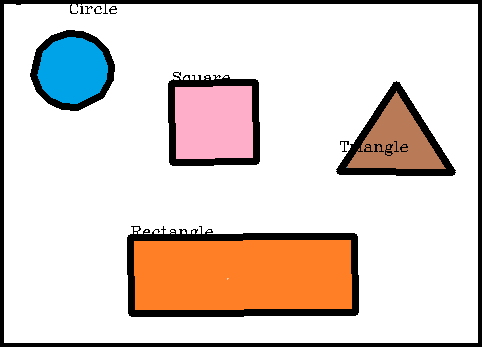

In [0]:
cv2_imshow(image)